In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [32]:
#Read in all columns except PassengerId, Ticket and Cabin 
train = pd.read_csv('/content/drive/MyDrive/INST/train.csv', usecols=['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [33]:
#Convert Sex to a numeric variable
for i in range(len(train)):
  if train.loc[i, 'Sex'] == 'male':
    train.loc[i, 'Sex'] = 1
  else:
    train.loc[i, 'Sex'] = 0

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C


In [34]:
#convert Embarked to a numeric variable 
for i in range(len(train)):
  if train.loc[i, 'Embarked'] == 'C':
    train.loc[i, 'Embarked'] = 1
  elif train.loc[i, 'Embarked'] == 'Q':
    train.loc[i, 'Embarked'] = 2
  else:
    train.loc[i, 'Embarked'] = 3

train


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,3
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,3
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1


In [35]:
#How many age rows are missing 
age_nan_n = train['Age'].isnull().sum()
age_nan_n

177

714

In [53]:
#There are 177 rows with missing age
#replace missing age with mean age
#len counts the number of rows so we want to divide by the number of peoples whose age we are counting
avg_age = train['Age'].sum()/(len(train)-177)
train = train.fillna(value=avg_age)

In [ ]:
#other options for filling missing age variable:

#this example goes through using the median age for each Parch and SibSP category
#https://www.kaggle.com/angps95/basic-classification-methods-for-titanic
#it also has a possible way to include the cabin variable

#Can simply take mean for males and females separately
#made a start but it didn't work
train_m = train[train["Sex"] == 1]
avg_age_m = train_m['Age'].sum()/len(train_m)

train_f = train[train["Sex"] == 0]
avg_age_f = train_m['Age'].sum()/len(train_f)

for i in range(len(train)):
  if train.loc[i, 'Sex'] == 1:
    train['Age'].fillna(value=avg_age_m)
  else:
    train['Age'].fillna(value=avg_age_f)

In [54]:
#Check that we no longer have missing rows
age_nan_n = train['Age'].isnull().sum()
age_nan_n

0

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f81d8194c20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py", line 178, in <lambda>
    target=child._parents: target.pop(sid))
KeyboardInterrupt


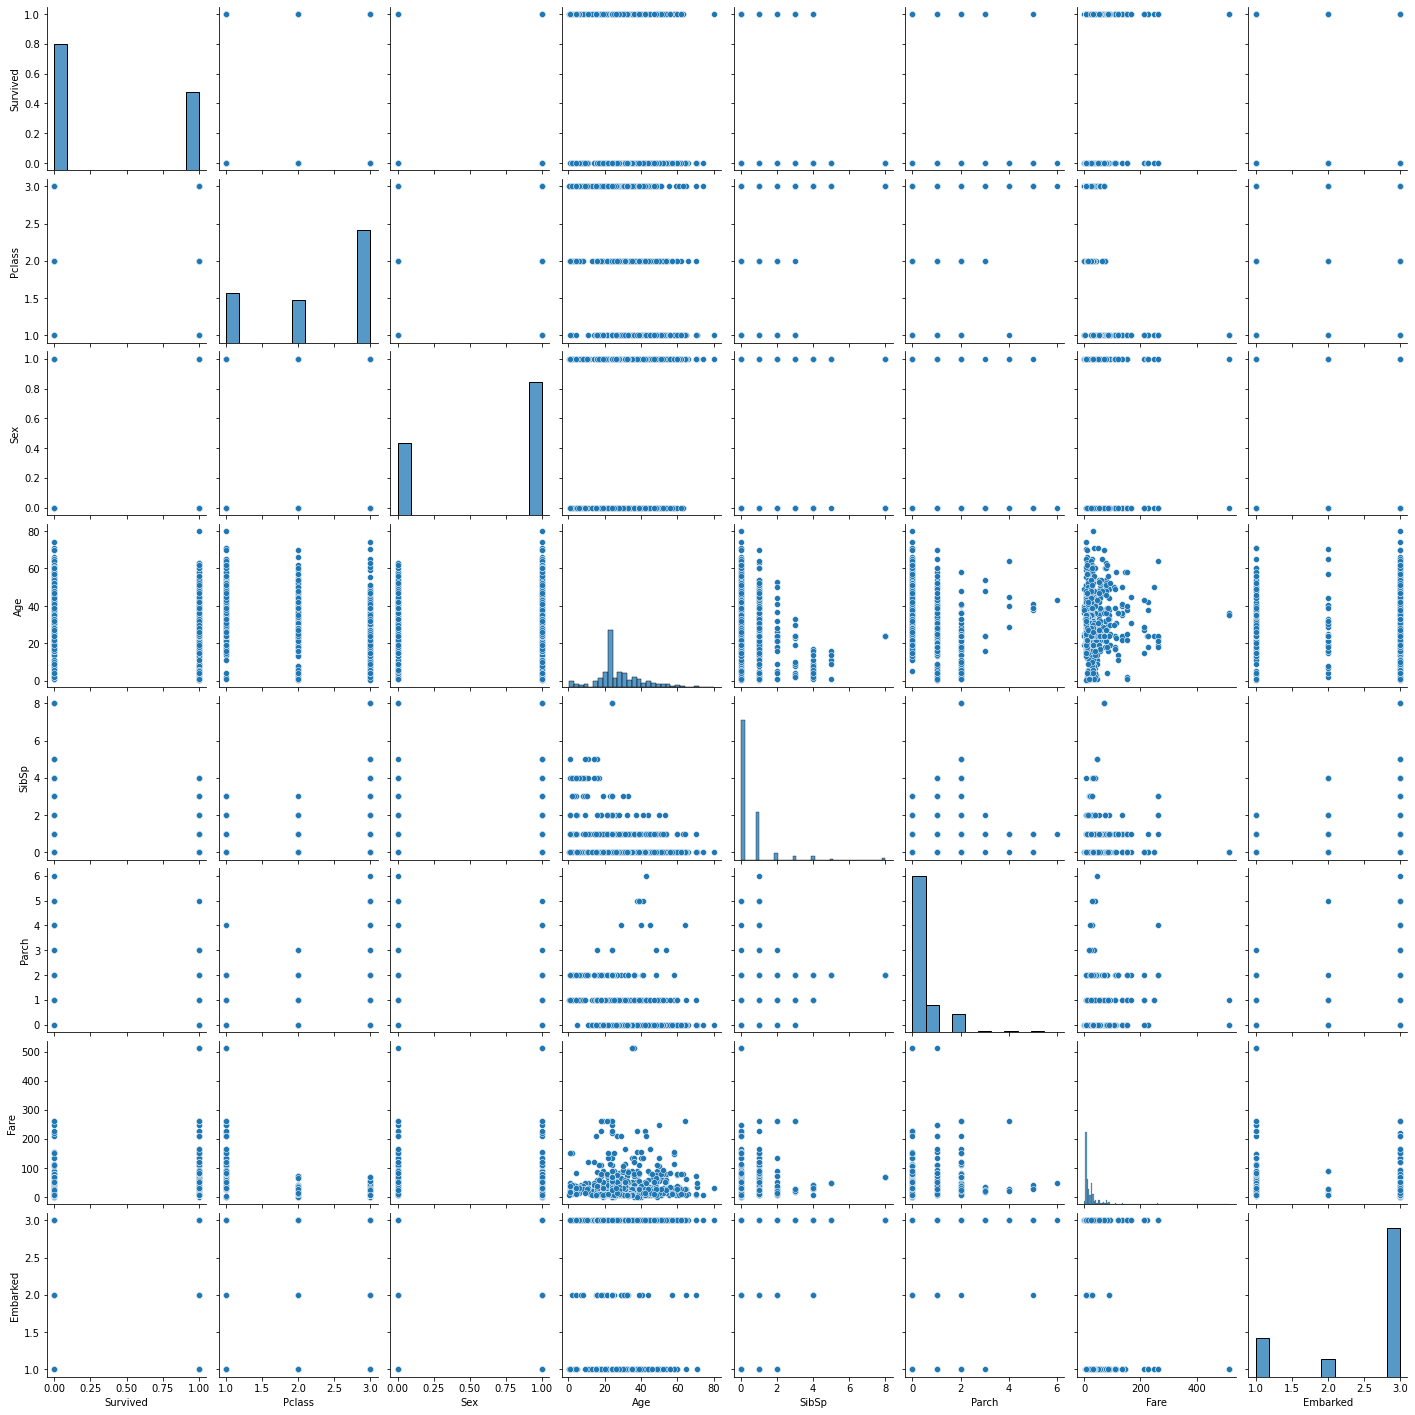

In [8]:
#plotting everything in scatter plots really doesn't show much as most variables are ordinal
sns.pairplot(train)

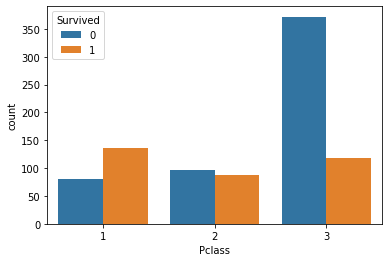

In [9]:
sns.countplot(x = 'Pclass', data = train, hue = "Survived")

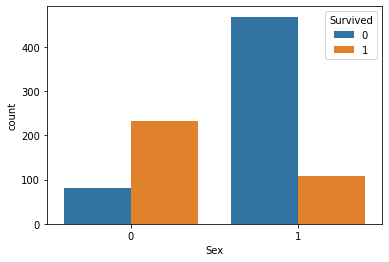

In [10]:
sns.countplot(x = 'Sex', data = train, hue = "Survived")

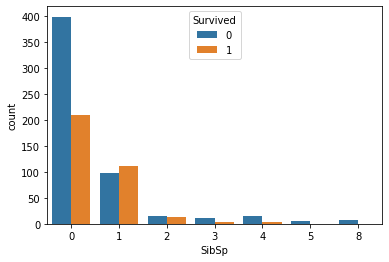

In [11]:
sns.countplot(x = 'SibSp', data = train, hue = "Survived")

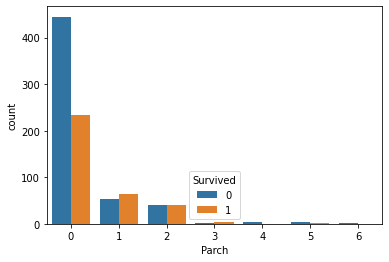

In [12]:
sns.countplot(x = 'Parch', data = train, hue = "Survived")

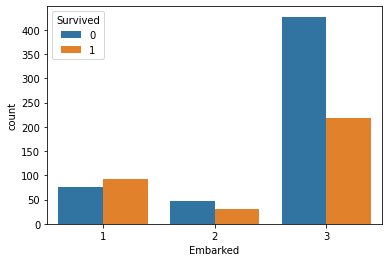

In [13]:
sns.countplot(x = 'Embarked', data = train, hue = "Survived")

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

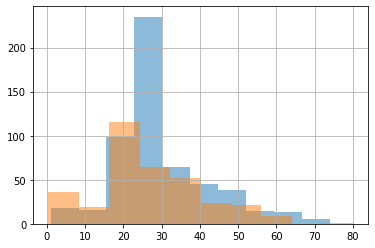

In [18]:
train["Age"].groupby(train["Survived"]).hist(alpha = 0.5)

In [71]:
#Creating new family_size column
train['Family_Size']=train1['SibSp']+train1['Parch']

#interaction between age and class
train['Age*Class']=train1['Age']*train1['Pclass']
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Age*Class
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3,1.0,1,66.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,3.0,1,38.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3,2.0,0,78.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3,3.0,1,35.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3,1.0,0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,3,4.0,0,54.0
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,3,2.0,0,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,1,2,23.4500,3,2.0,3,0.0
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1,1.0,0,26.0


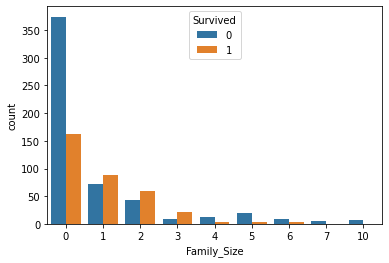

In [57]:
sns.countplot(x = 'Family_Size', data = train, hue = "Survived")

In [72]:
#Calculate the fare per person
#Found this online but not sure if it is correct as, for this to work, we have to assume that the Fare for families is recorded as the sum of their tickets
train['Fare_pp'] = train['Fare']/(train['Family_Size']+1)
train['Fare_pp'] = train['Fare_pp'].astype(int)
train

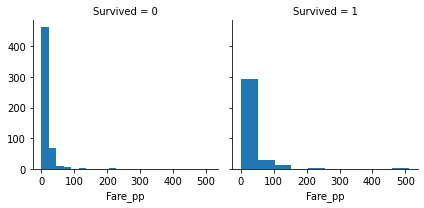

In [74]:
fare = sns.FacetGrid(train, col='Survived')
fare.map(plt.hist, 'Fare_pp')

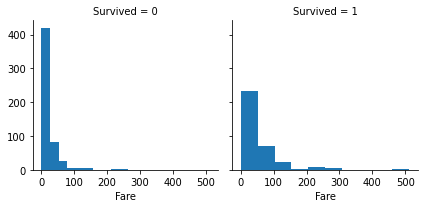

In [112]:
fare = sns.FacetGrid(train, col='Survived')
fare.map(plt.hist, 'Fare')

In [113]:
#Extract some information from the Name variable
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Rare": 4}

# extract titles
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
   # replace titles with a more common title or as Rare
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace(['Capt','Major', 'Rev', 'Sir'], 'Mr')

train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace(['Mme', 'Countess'], 'Mrs')
    # convert titles into numbers
train['Title'] = train['Title'].map(titles)
    # filling NaN with 0, to get safe
train['Title'] = train['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
train

AttributeError: ignored

In [ ]:
#alternative way of grouping the names found online. I haven't run this yet.
#Can compare this to the above method to see which produces more interesting results

train.insert(value=train.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")
Test.insert(value=Test.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")
#We then assign social status titles to them for more in-depth analysis.

title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"}
train["Title"]=train.Title.map(title_map)
Test["Title"]=Test.Title.map(title_map)

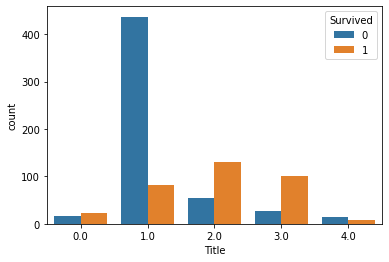

In [69]:
sns.countplot(x = 'Title', data = train, hue = "Survived")

In [97]:
#LDA part - ignore

#split the data into train and test set.
#When doing this properly we can randomly sample but just for now I took the first 700 rows in the training set
ttrain = train[0:700]
test = train[700:len(train)]
len(ttrain)+len(test)

train_survived = ttrain[ttrain.Survived==1]
train_dead = ttrain[ttrain.Survived==0]
del train_survived['Survived']
del train_dead['Survived']

#(number of people survived, number of people died)
survived_num = len(train_survived)
dead_num = len(train_dead)
survived_num, dead_num

#proportion survived/died
p1 = survived_num/(survived_num+dead_num)
p2 = dead_num/(survived_num+dead_num)
p1, p2

#sum each variable and divide by number of rows
#Not sure why???
m1 = np.array(train_survived.apply(sum)/survived_num)
m2 = np.array(train_dead.apply(sum)/dead_num)
m1, m2

#create 2 matrices (7x7) filled with zeros
#S1 = np.zeros((7,7))
#S2 = np.zeros((7,7))
#code i took this from did 7 but i think i have 11 rows so...
S1 = np.zeros((11,11))
S2 = np.zeros((11,11))

#turn these into arrays
survived = np.array(train_survived)
dead = np.array(train_dead)
survived

for i in range(survived_num):
    S1 = S1 + np.dot((survived[i,:]-m1).reshape(11,1),(survived[i,:]-m1).reshape(11,1).T)
for i in range(dead_num):
    S2 = S2 + np.dot((dead[i,:]-m2).reshape(11,1),(dead[i,:]-m2).reshape(11,1).T)
S1

Sw = S1 + S2
w = np.dot(np.linalg.inv(Sw),(m1-m2).reshape(11,1))
w

#here we must assume that the prior probability is unknown or we'll get a wrong w0
w0 = -1/2*np.dot(np.dot((m1+m2).reshape(11,1).T,np.linalg.inv(Sw)),(m1-m2).reshape(11,1))#-math.log(p2/p1)
w0

#????

#-------------------testing-----------------------------------------
test['Survived'] = 1
test = np.array(test.iloc[:,1:8])
test_num = test.shape[0]



for i in range(test_num):
    g = np.dot(w.T,test[i].reshape(7,1)) + w0
    #print(g)
    if g >= 0:
        result.loc[i,'Survived'] = 1
    else:
        result.loc[i,'Survived'] = 0


891